<a href="https://colab.research.google.com/github/Soum110/Hand-Written-Digit-Classification/blob/main/Hand_written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf   #importing tensorflow library as tf
from tensorflow import keras #from tensorflow importing keras
from tensorflow.keras import layers, models #from keras importing the layers and models sub-modules
import numpy as np #importing numpy as np
import matplotlib.pyplot as plt # importing mathplotlib as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #loading and arranging the mnist dataset into training and test data

In [ ]:
len(x_train), len(x_test) #displaying the length of the sub-datasets arranged in the previous line for training and testing (for the input part)

(60000, 10000)

In [ ]:
len(y_train), len(y_test) #displaying the length of the sub-datasets arranged in the previous lines for training and testing (for target part)

(60000, 10000)

In [ ]:
x_train.shape #shape of the resultant matrix where each training examples (in total 60,000), there is a image of 28×28 pixels values (grayscale)

(60000, 28, 28)

In [ ]:
x_train[257] # displaying an input of a training example

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 167, 225,  29,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 112, 254, 109,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   7, 185, 241,  98,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   4,  93, 254, 220,  25,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 205, 254, 178,  25,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,  48,
          0,   0,   0,   0,   0,   7, 210, 254, 121,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 186,  60,
          0,   0,   0,   0,   3, 128, 250, 228,  41,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 173, 254, 102,
          0,   0,   0,   0,  61, 252, 254, 143,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 254, 251,  53,
          0,   0,   0,  16, 136, 254, 230,  74,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  17, 219, 254, 165,   0,
          0,   0,   0, 124, 254, 252,  82,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 254, 254, 129,   0,
          0,   0,   0, 214, 254, 243,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  21, 214, 254, 254, 235, 214,
        194,  96,  96, 229, 254, 243,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  16, 198, 254, 254, 254, 254, 254,
        254, 254, 254, 254, 254, 243,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 212, 254, 250, 243, 243, 176,
        143, 251, 254, 255, 249,  65,   0,  23,  33,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  72, 107,  69,   0,   0,   0,
         39, 223, 254, 185,  59,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        160, 254, 254,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        106, 254, 254,  97,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47,
        191, 254, 190,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 131,
        254, 231,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 202,
        254, 167,  28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[257] #displaying a target value of a training example

np.uint8(4)

In [ ]:
x_train = x_train/255 #squeezing the 256 quantized grayscale values in between 0, 1 for the training examples
x_test = x_test/255 #squeezing the 256 quantized grayscale values in between 0, 1 for the test examples

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28) #converting the 3d tensor of (60000, 28, 28) to (60000, 784), where each img is now a vector of 784 values (784, 1)
x_train_flattened.shape # displaying the shape

(60000, 784)

In [ ]:
x_test_flattened = x_test.reshape(len(x_test), 28*28) #converting the 3d tensor of (10000, 28, 28) to (10000, 784), where each img is now a vector of 784 values (784, 1)
x_test_flattened.shape #displaying the shape

(10000, 784)

In [ ]:
model = keras.Sequential([                        #Building the forward pass
    keras.layers.Dense(16, input_shape = (784,), activation = 'relu'), #first layer of 16 neurons having input 784 values and activation function used is relu
    keras.layers.Dense(16, activation = 'relu'), #second layer of 16 neurons with input of 16 values from the previous layer activations and activation function used is relu
    keras.layers.Dense(10, activation = 'sigmoid') #final layer of 10 neurons with input of 16 values from the previous layer activations and activation function used is sigmoid
])

model.compile(optimizer = 'adam',    #optimizer used during backpropagation is adam
              loss = 'sparse_categorical_crossentropy', #cost/loss fuction calculation is done using categorical cross entropy funvtion
              metrics = ['accuracy'] #metric evaluated is accuracy
)

model.fit( x_train_flattened, y_train, epochs = 15) #training the model for 15 epochs

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7889 - loss: 0.7235
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9278 - loss: 0.2438
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9418 - loss: 0.1983
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9480 - loss: 0.1799
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1619
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9575 - loss: 0.1456
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9585 - loss: 0.1436
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9593 - loss: 0.1358
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9620 - loss: 0.1292
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9625 - loss: 0.1262
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.1219
Epoch 12/15
1875/1875 ━━━━━━━━

In [ ]:
model.evaluate(x_test_flattened, y_test) #evaluating the accuracy on the novel test inputs/examples

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1654


[0.15532349050045013, 0.9573000073432922]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


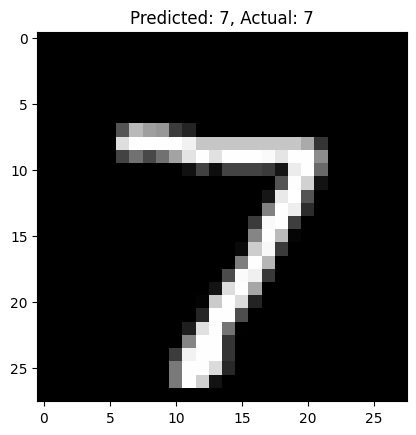

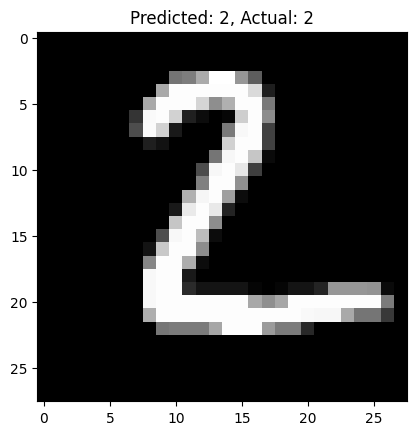

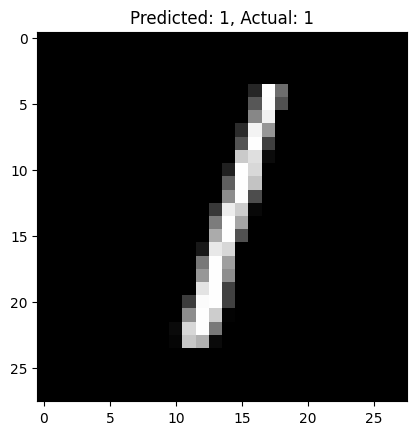

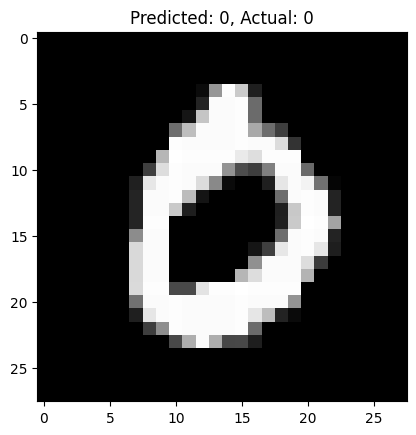

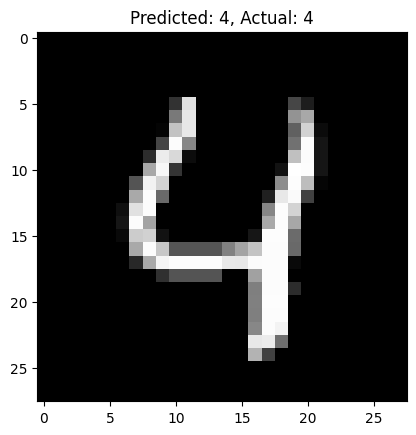

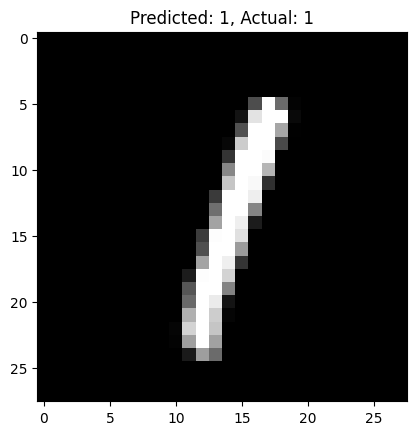

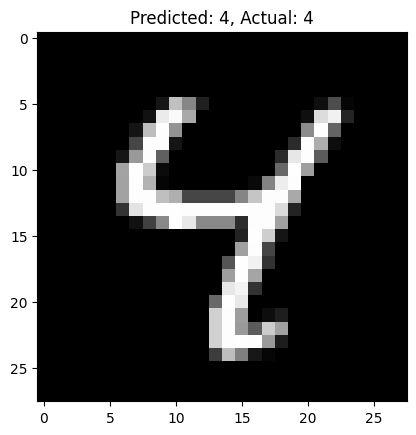

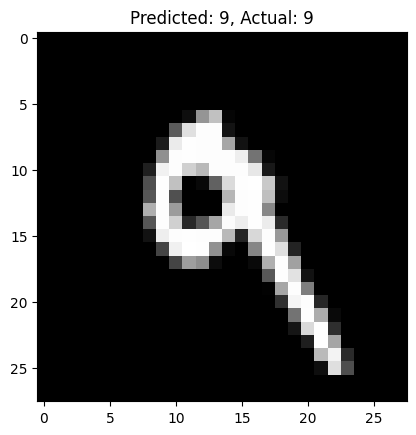

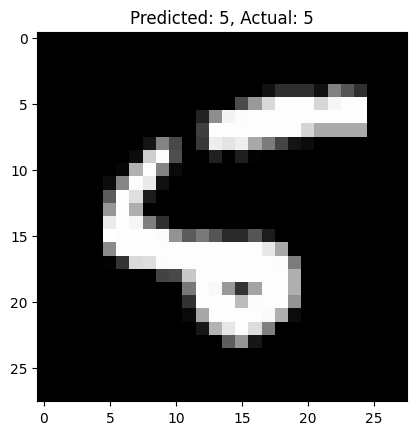

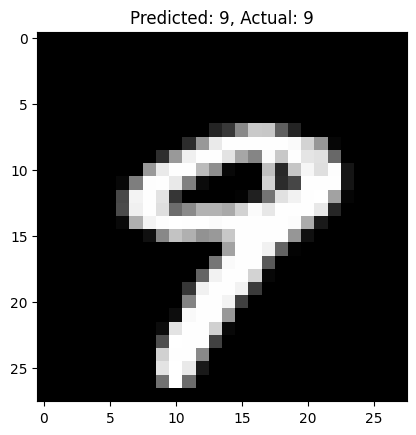

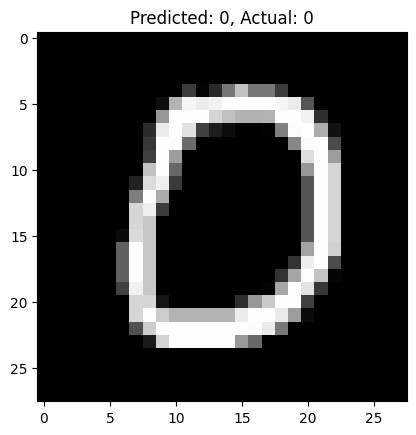

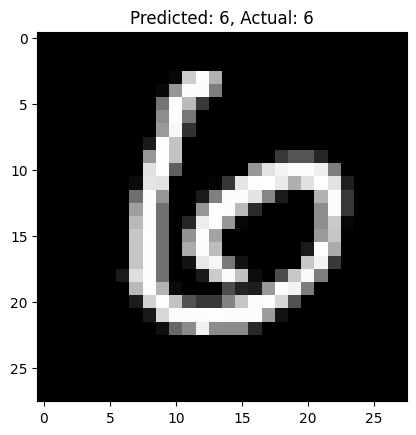

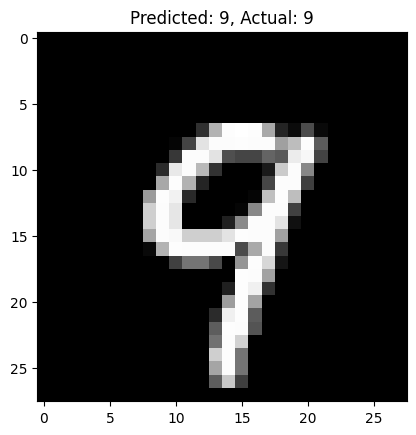

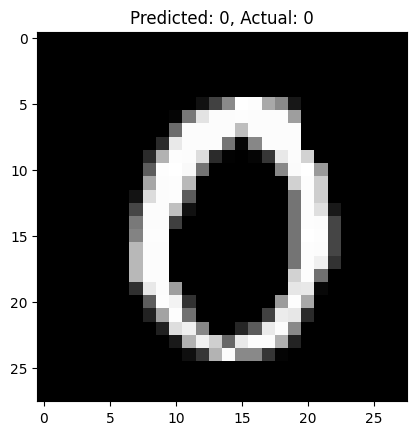

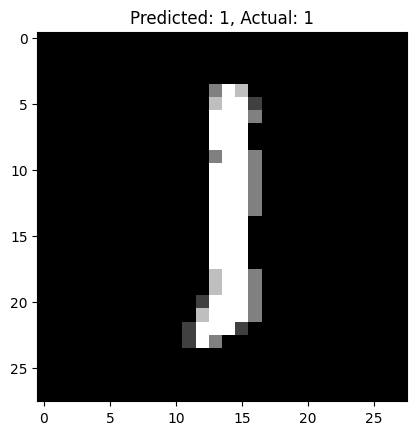

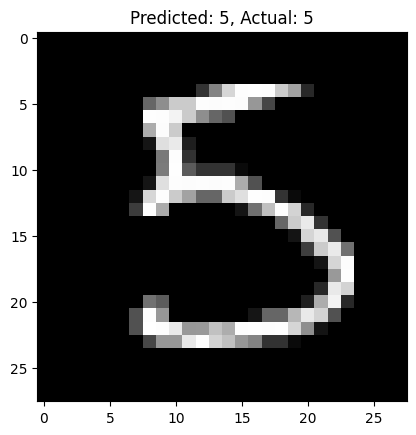

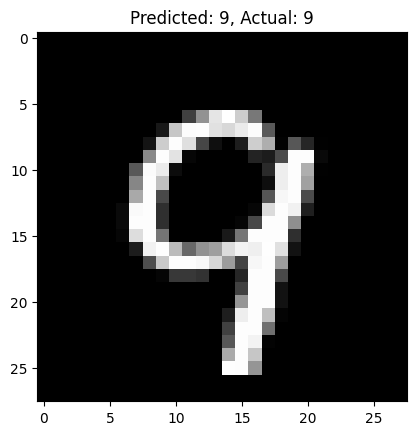

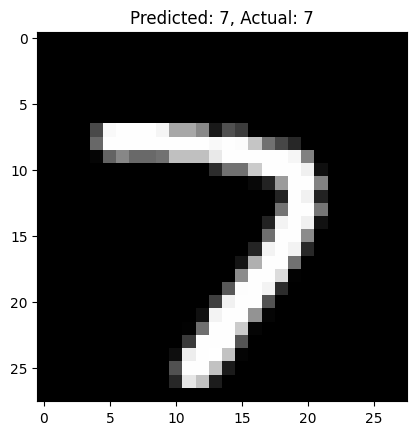

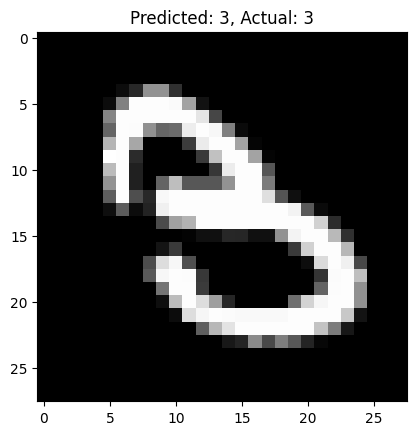

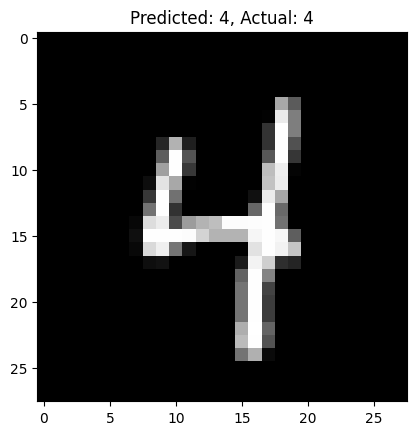

In [ ]:
predictions = model.predict(x_test_flattened) # contains the predicted values

for i in range(20):      #iterate for the first 20 test inputs
  plt.imshow(x_test[i], cmap = 'gray') #show the image in grayscale
  plt.title(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}') #print the predicted output vs the actual target/truth value
  plt.show() #display everything
